<a href="https://colab.research.google.com/github/silva-felipe/Neural_network/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [5]:
# pip install fsspec

     |████████████████████████████████| 132 kB 6.8 MB/s 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Dataset for training and testing

In [8]:
data_tr = pd.read_csv('https://raw.githubusercontent.com/silva-felipe/Neural_network/main/train_nn.csv')
data_tr = np.array(data_tr)
m,n = data_tr.shape

In [9]:
data_train = data_tr.T
Y_train = data_train[0]
X_train = data_train[1:]
X_train = X_train / 255.
_,m_train = X_train.shape

In [10]:
data_te = pd.read_csv('https://raw.githubusercontent.com/silva-felipe/Neural_network/main/test_nn.csv')
data_te = np.array(data_te)

In [11]:
data_test = data_te.T
Y_test = data_test[0]
X_test = data_test[1:]
X_test = X_test / 255.

#Neural Network

In [12]:
def init_params():
    weights1 = np.random.rand(10, 784) - 0.5
    biasses1 = np.random.rand(10, 1) - 0.5
    weights2 = np.random.rand(10, 10) - 0.5
    biasses2 = np.random.rand(10, 1) - 0.5
    return weights1, biasses1, weights2, biasses2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(weights1, biasses1, weights2, biasses2, X):
    input_layer = weights1.dot(X) + biasses1
    activation = ReLU(input_layer)
    output_layer = weights2.dot(activation) + biasses2
    output_activation = softmax(output_layer)
    return input_layer, activation, output_layer, output_activation

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(input_layer, activation, output_layer, output_activation, weights1, weights2, X, Y):
    one_hot_Y = one_hot(Y)
    doutput_layer = output_activation - one_hot_Y
    dweights2 = 1 / m * doutput_layer.dot(activation.T)
    dbiasses2 = 1 / m * np.sum(doutput_layer)
    dinput_layer = weights2.T.dot(doutput_layer) * ReLU_deriv(input_layer)
    dweights1 = 1 / m * dinput_layer.dot(X.T)
    dbiasses1 = 1 / m * np.sum(dinput_layer)
    return dweights1, dbiasses1, dweights2, dbiasses2

def update_params(weights1, biasses1, weights2, biasses2, dweights1, dbiasses1, dweights2, dbiasses2, alpha):
    weights1 = weights1 - alpha * dweights1
    biasses1 = biasses1 - alpha * dbiasses1    
    weights2 = weights2 - alpha * dweights2  
    biasses2 = biasses2 - alpha * dbiasses2    
    return weights1, biasses1, weights2, biasses2

In [13]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    weights1, biasses1, weights2, biasses2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(weights1, biasses1, weights2, biasses2, X)
        dweights1, dbiasses1, dweights2, dbiasses2 = backward_prop(Z1, A1, Z2, A2, weights1, weights2, X, Y)
        weights1, biasses1, weights2, biasses2 = update_params(weights1, biasses1, weights2, biasses2, dweights1, dbiasses1, dweights2, dbiasses2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return weights1, biasses1, weights2, biasses2

In [14]:
weights1, biasses1, weights2, biasses2 = gradient_descent(X_train, Y_train, 0.15, 500)

Iteration:  0
[3 6 2 ... 2 3 2] [1 0 1 ... 4 7 9]
0.0686
Iteration:  10
[3 6 2 ... 3 8 0] [1 0 1 ... 4 7 9]
0.1725
Iteration:  20
[1 0 2 ... 5 8 0] [1 0 1 ... 4 7 9]
0.2082
Iteration:  30
[1 0 2 ... 5 8 0] [1 0 1 ... 4 7 9]
0.2379
Iteration:  40
[1 0 8 ... 5 8 6] [1 0 1 ... 4 7 9]
0.2724
Iteration:  50
[1 0 8 ... 9 8 6] [1 0 1 ... 4 7 9]
0.3297
Iteration:  60
[1 0 8 ... 9 5 5] [1 0 1 ... 4 7 9]
0.3887
Iteration:  70
[1 0 8 ... 9 0 5] [1 0 1 ... 4 7 9]
0.4375
Iteration:  80
[1 0 8 ... 4 5 5] [1 0 1 ... 4 7 9]
0.489
Iteration:  90
[1 0 8 ... 4 5 9] [1 0 1 ... 4 7 9]
0.5404
Iteration:  100
[1 0 8 ... 4 5 9] [1 0 1 ... 4 7 9]
0.5859
Iteration:  110
[1 0 8 ... 4 5 9] [1 0 1 ... 4 7 9]
0.6322
Iteration:  120
[1 0 1 ... 4 5 9] [1 0 1 ... 4 7 9]
0.6661
Iteration:  130
[1 0 1 ... 4 5 9] [1 0 1 ... 4 7 9]
0.6881
Iteration:  140
[1 0 1 ... 4 5 9] [1 0 1 ... 4 7 9]
0.7021
Iteration:  150
[1 0 1 ... 4 5 9] [1 0 1 ... 4 7 9]
0.7153
Iteration:  160
[1 0 1 ... 4 5 9] [1 0 1 ... 4 7 9]
0.7266
Iteration

In [28]:
def make_predictions(X, weights1, biasses1, weights2, biasses2):
    _, _, _, A2 = forward_prop(weights1, biasses1, weights2, biasses2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, weights1, biasses1, weights2, biasses2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, weights1, biasses1, weights2, biasses2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  1


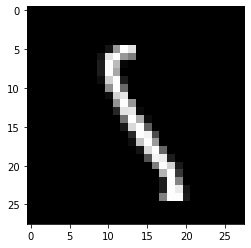

In [29]:
test_prediction(1979, weights1, biasses1, weights2, biasses2)